<a href="https://colab.research.google.com/github/nicoavilan/Metodos-Numericos/blob/main/Diferencias-finitas/EcCalor_1D_Dirichlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solución de la Ecuación de Calor de dimensión 1** <b><font color="blue">(Dirichlet)</font>


En este documento se presenta la solución de la ecuación de calor con <font color="red">condición de frontera de Dirichlet</font>.

Para ver el caso de la ecuación de calor con <font color="red">condición de frontera de Neumann</font> haga consulte este [enlace](https://github.com/nicoavilan/Metodos-Numericos/blob/main/Diferencias-finitas/EcCalor_1D_Neumann.ipynb).

La ecuación de calor unidimensional está dada por
\begin{equation}
\frac{\partial\phi(t,x)}{\partial t} = D \frac{\partial^2\phi(t,x)}{\partial x^2}
\end{equation} 
 
Si se describe la propagación del calor en una barra unidimensional de longitud $L=2$ con constante de propagación de calor $D=0.1$ en el transcurso de 20 unidades de tiempo, hay que resolver la ecuación anterior con sus respectivas condiciones de frontera.

En este ejemplo se calcula la solución al considerar las siguientes condiciones de frontera de [Dirichlet](https://es.wikipedia.org/wiki/Condici%C3%B3n_de_frontera_de_Dirichlet) 
 
\begin{equation}
\phi(0,x) = 6\sin\left(\frac{\pi x}{L}\right), \qquad \phi(t,0) =0, \qquad \phi(t,L) =0.
\end{equation} 

Para efectos de la discretización se construye una matriz $M$ en el código donde se registran los valores de la solución en valores discretos de espacio y tiempo $\phi(t_n,x_m)$.

## Código

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

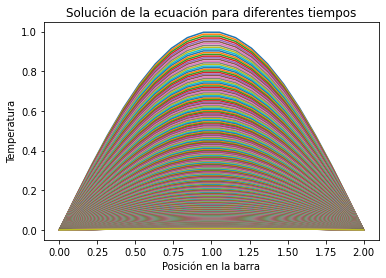

In [ ]:
fil = 500 # Número de filas en la Matriz M
col = 20  # Número de columnas en la Matriz M

M = np.zeros((fil,col)) # En esta matriz se calculan los valores de la discretización.

L = 2   # Longitud de la barra
T = 20  # Tiempo considerado
D = 0.1 # Constante de propagación del calor

ht = T/(fil-1)
hx = L/(col-1)

x = np.linspace(0,2,col)
M[0,:] = np.sin(np.pi*x/L) # Condición inicial

for n in range(fil-1):
  for m in range(1,col-1):
    M[n+1,m] = M[n,m] + (D*ht/hx**2)*(M[n,m+1] -2*M[n,m] + M[n,m-1]) # Discretización de la ecuación diferencial
  plt.plot(x,M[n,:])
plt.title("Solución de la ecuación para diferentes tiempos")
plt.xlabel("Posición en la barra")
plt.ylabel("Temperatura")
plt.show()

## Animación

La evolución de la temperatura en la barra se entiende mejor al hacer una animación con la solución de la ecuación diferencial.

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

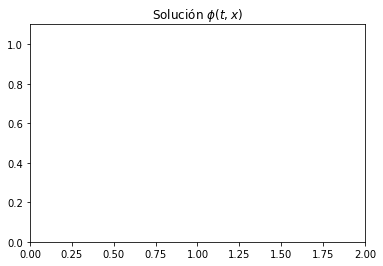

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, L))
ax.set_ylim((0, 1.1))

line, = ax.plot([], [], lw=3, color="red")
ax.set_title("Solución $\phi(t,x)$");

In [ ]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    y = M[i,:]
    line.set_data(x, y)
    return (line,)

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=fil, interval=100, blit=True)
HTML(anim.to_html5_video())

La animación se observa al ejecutar el código, GitHub no la genera automáticamente.

